In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sf
import seaborn as sns

# Binomial Regression

In [4]:
titanic = pd.read_csv(r'D:\DataSets\Stepik Courses Data\titanik_full_data_1.csv', sep='\t')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Quantities')

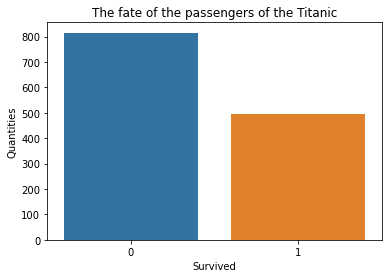

In [7]:
# We will use only four main columns (Survived, Sex, Age, Pclass)
sns.countplot(data = titanic, x='Survived')
plt.title('The fate of the passengers of the Titanic')
plt.xlabel('Survived')
plt.ylabel('Quantities')

In [11]:
# Applying Logistic Regression
logit_res = sf.glm('Survived ~ C(Pclass)+C(Sex)+(Age)', titanic,family = sm.families.Binomial()).fit()

In [12]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Wed, 30 Aug 2023   Deviance:                       796.42
Time:                        09:42:10   Pearson chi2:                 1.10e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4421
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

Intercept is the odds of survival (logarithmic) for a woman in first grade who is 0 years old.

1.All coefficients are significant (P>|z| less than 0.05)
2.The chances of surviving in the second grade are lower than in the first, and even lower in the third
3.Being a man on the Titanic is even worse
4.It's also bad to be older on the Titanic

# Multinomial Regression

Text(0, 0.5, 'Quantities')

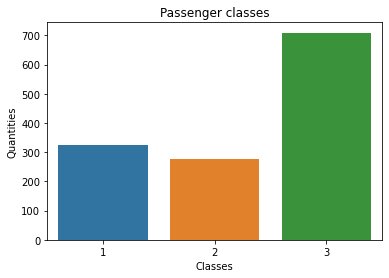

In [14]:
sns.countplot(x='Pclass', data=titanic)
plt.title('Passenger classes')
plt.xlabel('Classes')
plt.ylabel('Quantities')

In [15]:
multi_res = sf.mnlogit('Pclass~(Age)+C(Sex)', titanic).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Wed, 30 Aug 2023   Pseudo R-squ.:                  0.1028
Time:                        10:01:01   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

Результат интерпретируем относительно первого класса:

1.Мужчин больше во втором, а в третьем ещё больше
2.Судя по тому, что интерцепт тоже больше (а в него входят женщины), женщин тоже больше => в других классах просто больше людей
3.У возраста обратная зависимость